# Exportações Internacionais por Ano e Mês

Descrição: Esta base de dados, carregada a partir do arquivo 'exportacao_full.csv', disponível em [Kaggle](https://www.kaggle.com/datasets/hugovallejo/brazil-exports), contém informações detalhadas sobre as exportações internacionais, organizadas por ano e mês. Ela inclui dados como o país de origem, cidade de origem, códigos e descrições de produtos, blocos econômicos, valores em dólares FOB e pesos líquidos das exportações. Os nomes das colunas foram mapeados de acordo com o dicionário de mapeamento fornecido, tornando-a pronta para análise e exploração de tendências nas exportações ao longo do tempo.

In [ ]:
#DOWNLOAD DATASET
#pip install kaggle
#!kaggle datasets download -d hugovallejo/brazil-exports
#!unzip brazil-exports.zip 
#!rm -rf brazil-exports.zip 

In [4]:
#bibliotecas utilizadas

import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

#criando dataset a partir do arquivo csv

data = pd.read_csv('exportacao_notfull.csv')
column_names_mapping = {
    'Year': 'Ano',
    'Month': 'Mes',
    'Country': 'Pais',
    'City': 'Cidade',
    'SH4 Code': 'CodigoSH4',
    'SH4 Description': 'DescricaoSH4',
    'SH2 Code': 'CodigoSH2',
    'SH2 Description': 'DescricaoSH2',
    'Economic Block': 'Blocoeconomico',
    'US$ FOB': 'ValorFOBUS',
    'Net Weight': 'PesoLiquido'
}

data.rename(columns=column_names_mapping, inplace=True)

data.head()


,Ano,Mes,Pais,Cidade,CodigoSH4,DescricaoSH4,CodigoSH2,DescricaoSH2,Blocoeconomico,ValorFOBUS,PesoLiquido
0,2010.0,1.0,Afghanistan,Itajaí - SC,207.0,"Meat and edible offal, of the poultry of headi...",2.0,Meat and edible meat offal,Asia (minus MIDDLE EAST),197162.0,99945.0
1,2010.0,1.0,Afghanistan,Lapa - PR,207.0,"Meat and edible offal, of the poultry of headi...",2.0,Meat and edible meat offal,Asia (minus MIDDLE EAST),114570.0,76989.0
2,2010.0,1.0,Afghanistan,Rolândia - PR,207.0,"Meat and edible offal, of the poultry of headi...",2.0,Meat and edible meat offal,Asia (minus MIDDLE EAST),72900.0,54000.0
3,2010.0,1.0,Afghanistan,São Paulo - SP,207.0,"Meat and edible offal, of the poultry of headi...",2.0,Meat and edible meat offal,Asia (minus MIDDLE EAST),153593.0,106541.0
4,2010.0,1.0,Afghanistan,Xaxim - SC,207.0,"Meat and edible offal, of the poultry of headi...",2.0,Meat and edible meat offal,Asia (minus MIDDLE EAST),26739.0,24990.0


## 1. Pré-processamento

In [5]:
# Verifica a quantidade de valores nulos em cada coluna
null_counts = data.isna().sum()

# Verifica a quantidade de strings vazias em cada coluna
empty_string_counts = (data == '').sum()

# Verifica a quantidade de valores problemáticos 
negative_value_counts = (data['ValorFOBUS'] < 0).sum()  

# Mostra um resumo das informações sobre o DataFrame
data_info = data.info()

# Exibe os resultados
print("Quantidade de Valores Nulos em Cada Coluna: \n")
print(null_counts)
print("\nQuantidade de Strings Vazias em Cada Coluna: \n")
print(empty_string_counts)
print("\nQuantidade de Valores Problemáticos: \n")
print(negative_value_counts)
print("\nResumo das Informações do DataFrame: \n")
print(data_info)

# Verifica linhas duplicadas com base em todas as colunas
duplicates = data[data.duplicated()]

# Remove linhas duplicadas (mantém a primeira ocorrência)
data_no_duplicates = data.drop_duplicates()

# Exibe as linhas duplicadas
print("Linhas Duplicadas: ")
print(duplicates)

# Exibe as estatísticas após a remoção de duplicatas
print("\n Estatísticas após Remoção de Duplicatas: \n")
print(data_no_duplicates.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13124813 entries, 0 to 13124812
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Ano             float64
 1   Mes             float64
 2   Pais            object 
 3   Cidade          object 
 4   CodigoSH4       float64
 5   DescricaoSH4    object 
 6   CodigoSH2       float64
 7   DescricaoSH2    object 
 8   Blocoeconomico  object 
 9   ValorFOBUS      float64
 10  PesoLiquido     float64
dtypes: float64(6), object(5)
memory usage: 1.1+ GB
Quantidade de Valores Nulos em Cada Coluna: 

Ano               262289
Mes               263059
Pais              262063
Cidade            262335
CodigoSH4         263468
DescricaoSH4      262255
CodigoSH2         262325
DescricaoSH2      263349
Blocoeconomico    262071
ValorFOBUS        262192
PesoLiquido       262541
dtype: int64

Quantidade de Strings Vazias em Cada Coluna: 

Ano               0
Mes               0
Pais              0
Cidade        

### 1.1 Conclusão do pré-processamento
O conjunto de dados possui um total de 13.124.813 entradas e 11 colunas. As colunas consistem em diferentes tipos de dados, com 6 colunas contendo valores inteiros (int64) e 5 colunas contendo objetos (strings).

Ao verificar a qualidade dos dados, identificamos o seguinte:

Não há valores nulos em nenhuma das colunas.
Todas as colunas estão livres de strings vazias.
Não foram encontrados valores problemáticos (negativos) na coluna 'ValorFOBUS'.
Além disso, após a verificação de duplicatas, não foram encontradas linhas duplicadas no conjunto de dados. Portanto, o DataFrame após a remoção de duplicatas mantém o mesmo número de entradas, 13.124.813, e ainda mantém as mesmas estruturas de colunas.

Essas verificações garantem que os dados estejam prontos para análises posteriores, com um conjunto de dados limpo e completo.

## 

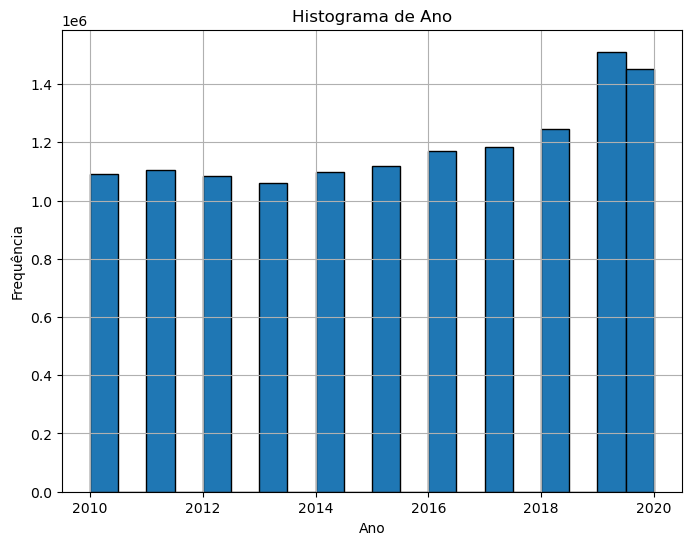

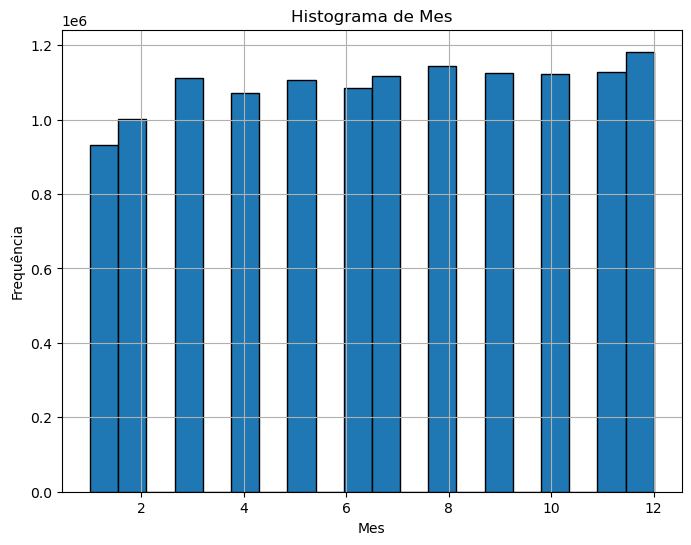

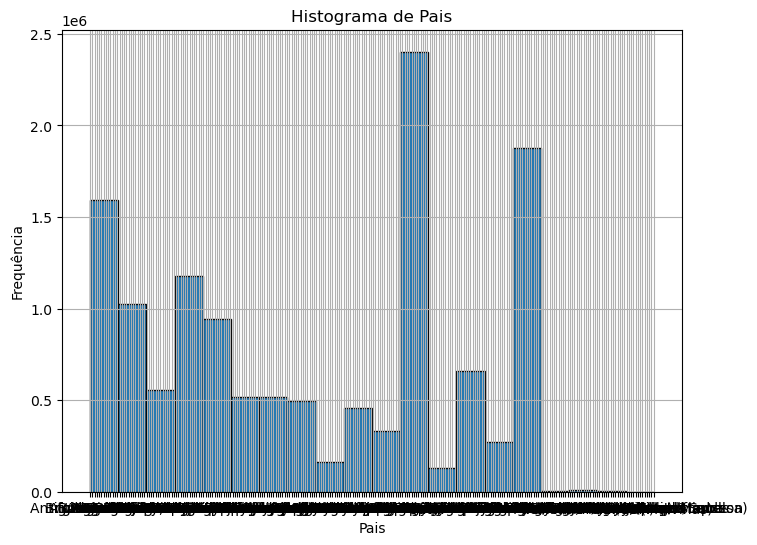

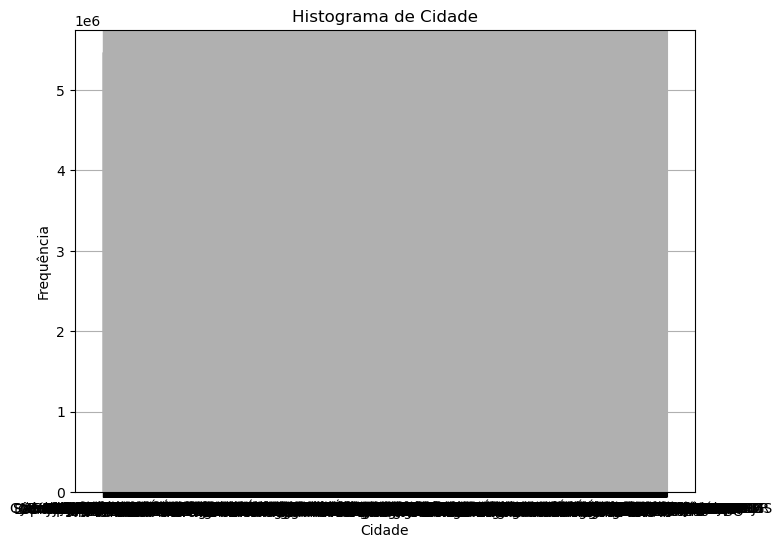

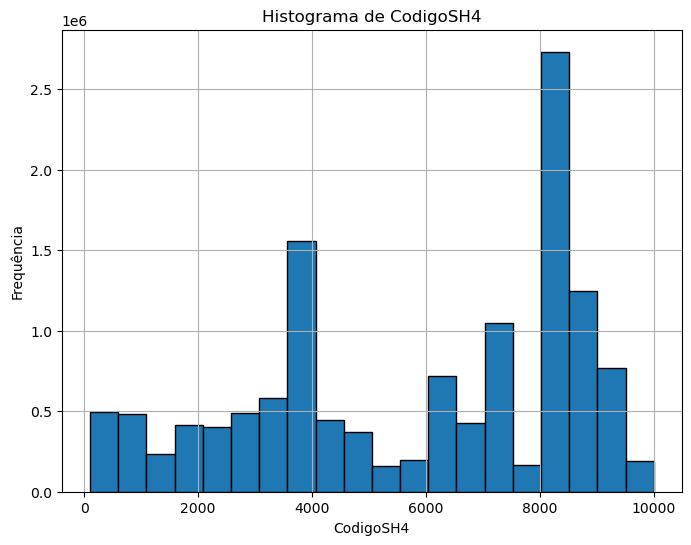

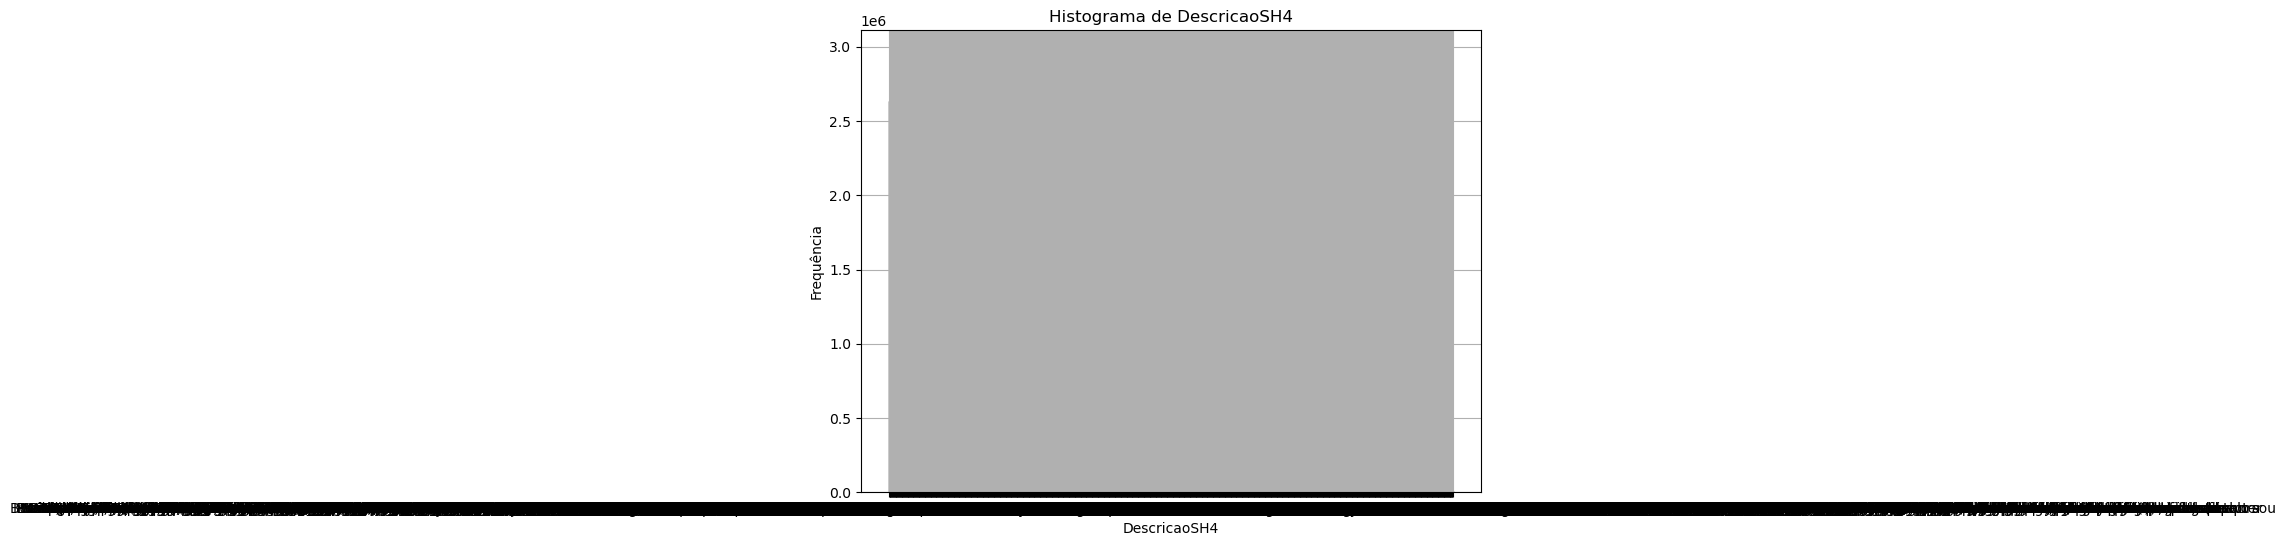

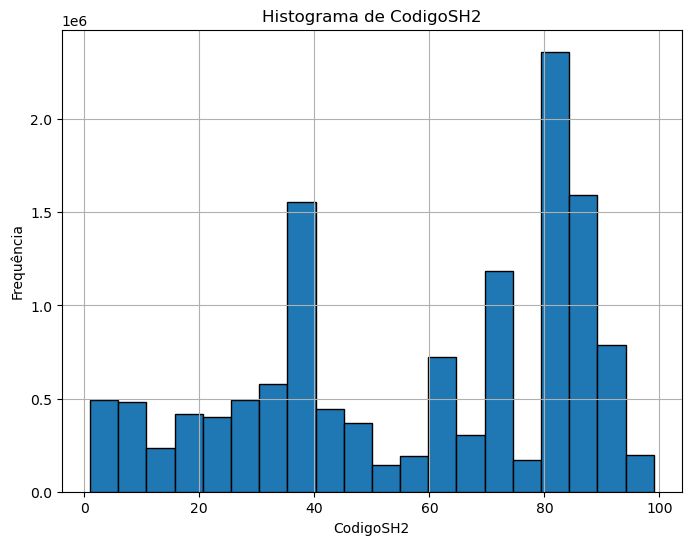

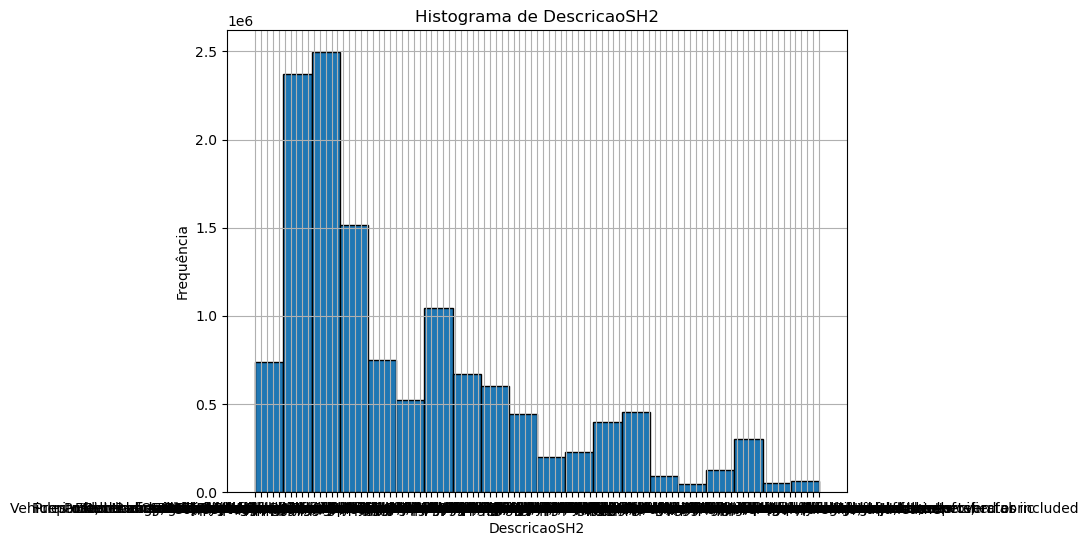

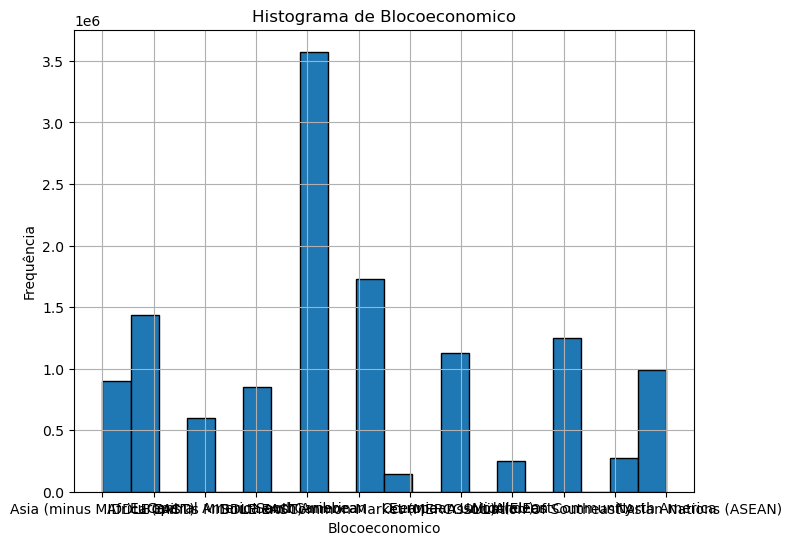

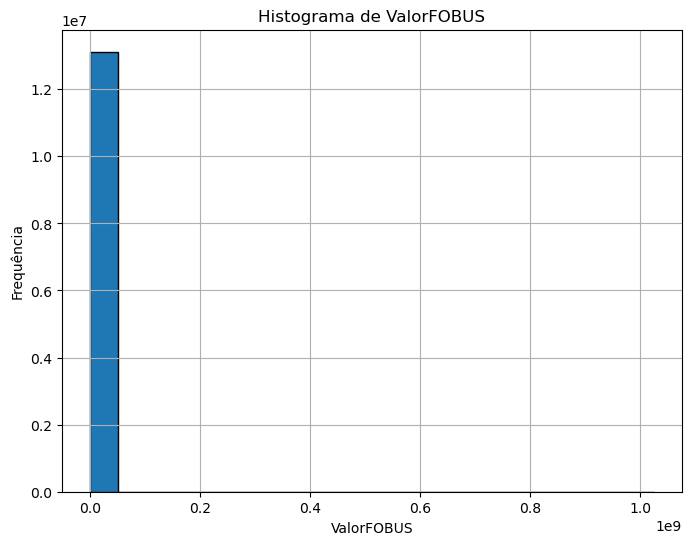

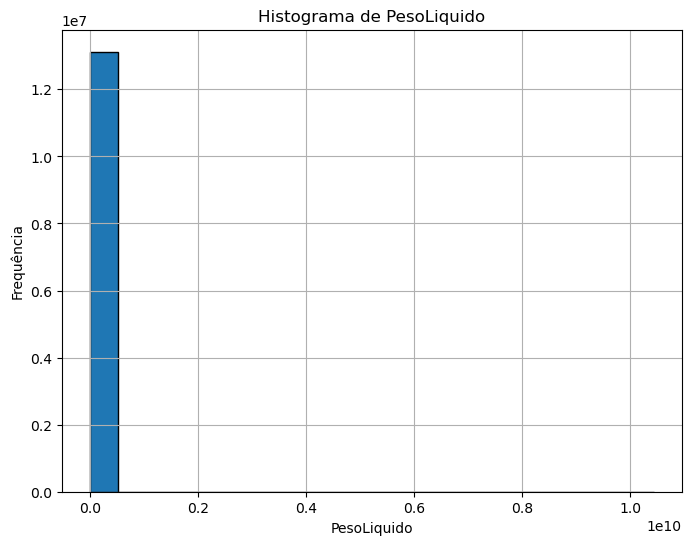

In [8]:
for column in data.columns:
    plt.figure(figsize=(8, 6))  # Define o tamanho da figura
    plt.hist(data[column], bins=20, edgecolor='k')  # Plota o histograma com 20 bins
    plt.title(f'Histograma de {column}')  # Define o título do gráfico
    plt.xlabel(column)  # Define o rótulo do eixo x
    plt.ylabel('Frequência')  # Define o rótulo do eixo y
    plt.grid(True)  # Adiciona grade ao gráfico
    plt.show()  # Mostra o gráfico
